In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn import metrics

# Reading Data

In [4]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
data.shape

(319795, 18)

In [8]:
data.groupby('HeartDisease')['Sex'].value_counts(normalize=True)*100

HeartDisease  Sex   
No            Female    53.542825
              Male      46.457175
Yes           Male      58.959559
              Female    41.040441
Name: proportion, dtype: float64

In [9]:
data.groupby("Smoking")['Sex'].value_counts(normalize=True)*100

Smoking  Sex   
No       Female    56.031551
         Male      43.968449
Yes      Male      52.596507
         Female    47.403493
Name: proportion, dtype: float64

In [10]:
data.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True)*100

AlcoholDrinking  Sex   
No               Female    52.529377
                 Male      47.470623
Yes              Female    51.696744
                 Male      48.303256
Name: proportion, dtype: float64

# Check Nulls

In [11]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No null values

# Handling Duplicated Values

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
#Looking for one row
data.iloc[0]

HeartDisease               No
BMI                      16.6
Smoking                   Yes
AlcoholDrinking            No
Stroke                     No
PhysicalHealth            3.0
MentalHealth             30.0
DiffWalking                No
Sex                    Female
AgeCategory             55-59
Race                    White
Diabetic                  Yes
PhysicalActivity          Yes
GenHealth           Very good
SleepTime                 5.0
Asthma                    Yes
KidneyDisease              No
SkinCancer                Yes
Name: 0, dtype: object

There are 17 Features numerical & categorical.

HeartDisease is the Target.



# Data Visualization

# What is the overall ratio of Heart Disease ?


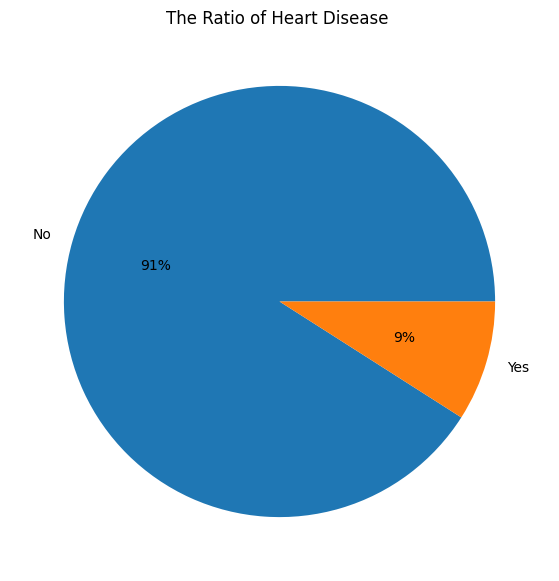

In [14]:
fig, ax = plt.subplots(1, 1,figsize =(10, 7))
ax.pie(data['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
fig.show()

# What is the relation between heart disease, skin cancer & kidney disease Vs the age ?


In [15]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

<ipython-input-16-b4a572016a38>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
<ipython-input-16-b4a572016a38>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
<ipython-input-16-b4a572016a38>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)


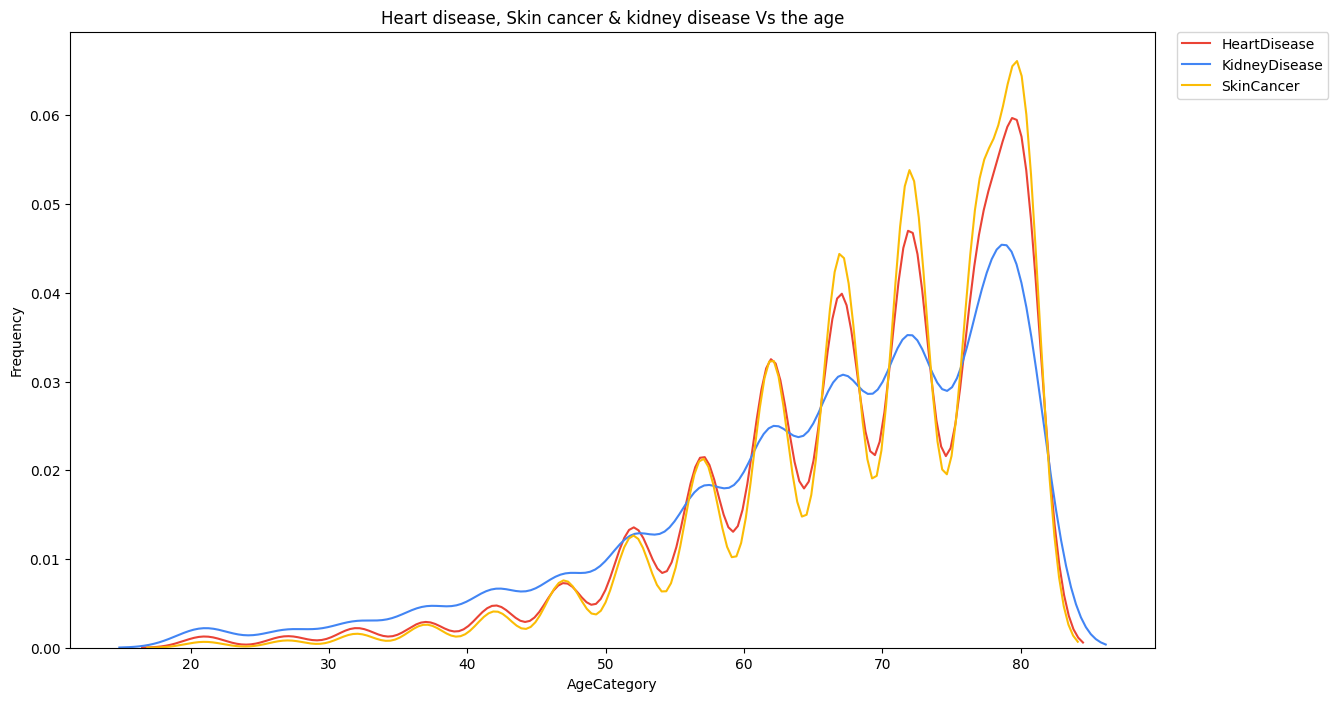

In [16]:
fig, ax = plt.subplots(figsize = (14,8))

sns.kdeplot(data[data["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(data[data["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(data[data["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Heart disease, Skin cancer & kidney disease Vs the age')
plt.show()

People found to have heart disease, skin cancer & kidney disease are mostly old people

# The relation between Heart Disease & Sex


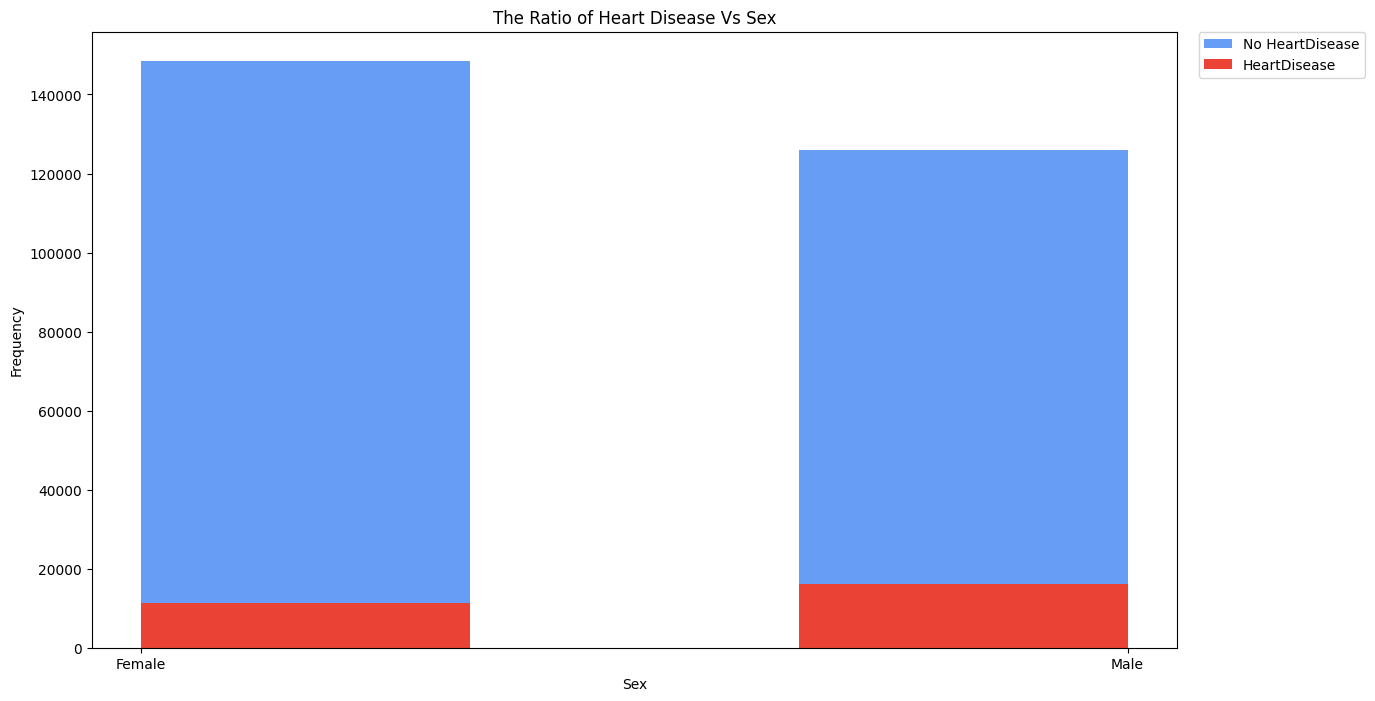

In [17]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")
plt.title('The Ratio of Heart Disease Vs Sex')
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [18]:
female_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Female')])
num_female = len(data[data['Sex']=='Female'])
male_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Male')])
num_male = len(data[data['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.11297748616645312
Probability of Female to have Heart disease: 0.07022565149588841


Males are approximately 1.6 times more likely to have heart disease than females

# What is the effect of smoking in Heart disease ?


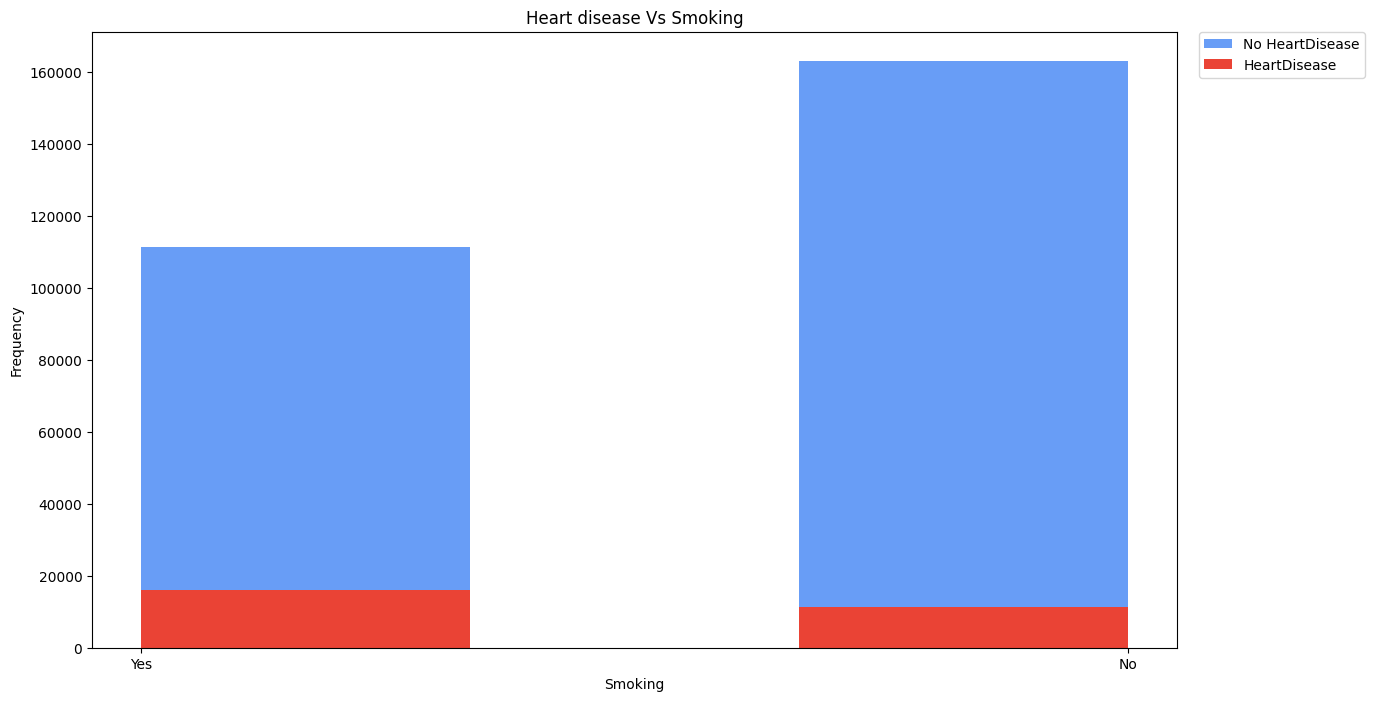

In [19]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Smoking')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [20]:
smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='Yes')])
num_smoke = len(data[data['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='No')])
num_no_smoke = len(data[data['Smoking']=='No'])
print('Probability of smoke to have Heart disease:', smoke_and_heart_disease/num_smoke)
print('Probability of no smoke to have Heart disease:', no_smoke_and_heart_disease/num_no_smoke)

Probability of smoke to have Heart disease: 0.12540324163101918
Probability of no smoke to have Heart disease: 0.06473449905915829


People who smoke are approximately twice as likely to have heart disease than people who don't smoke

# What is the relation of Heart disease Vs the race ?


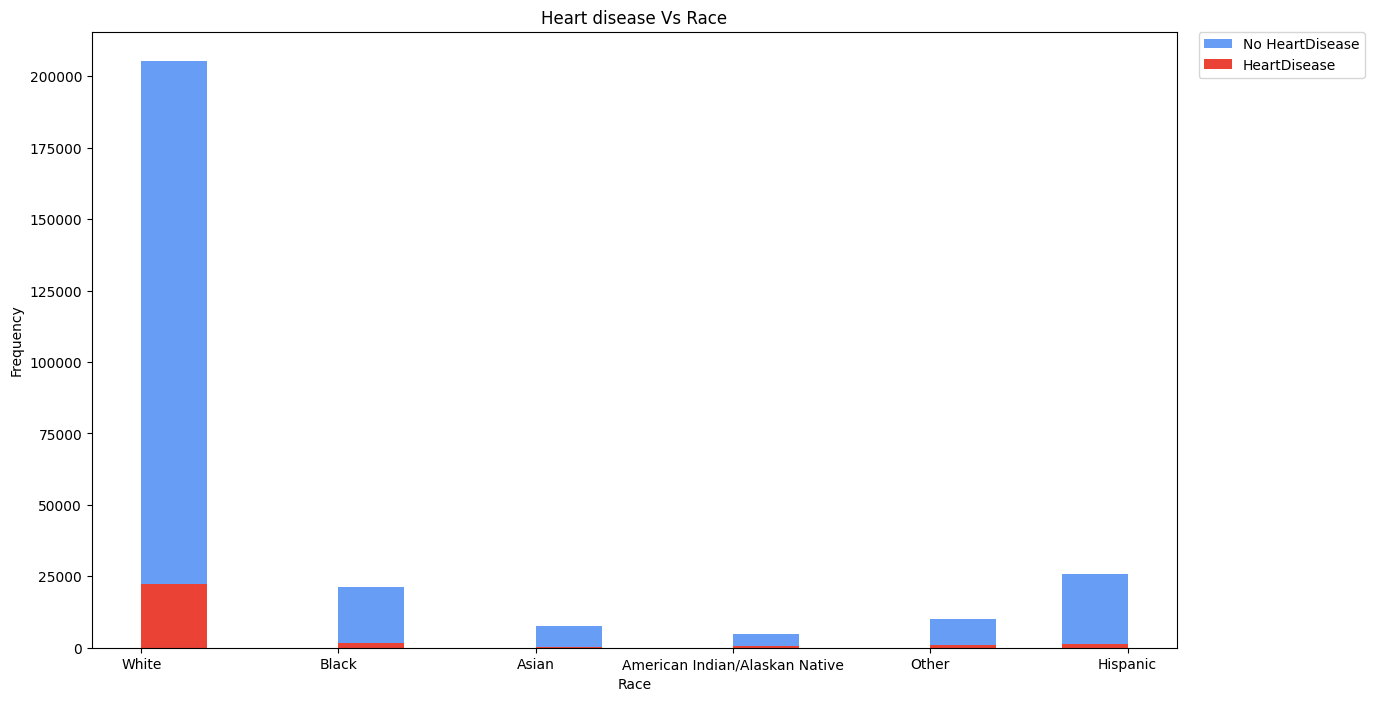

In [21]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Race')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

==> Most Heart Disease Patients are White people

i don't know why?

# Does the general health affect to Heart disease ?


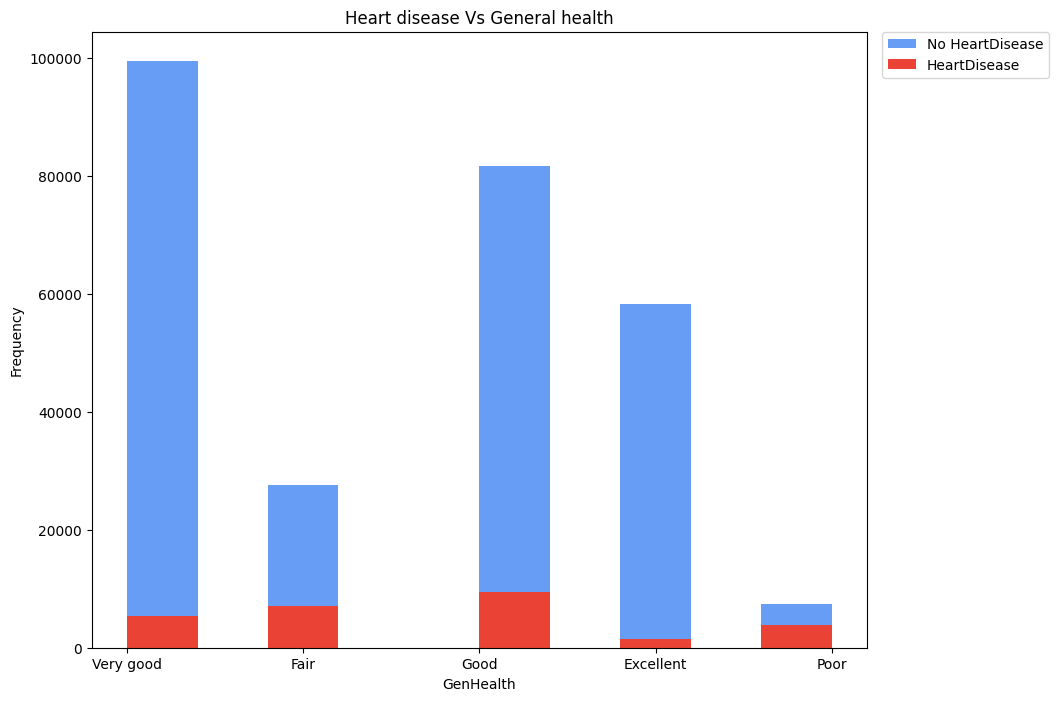

In [22]:
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(data[data["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs General health')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Most poor general health Patients have high heart Disease

# What is the relation of Heart disease & BMI


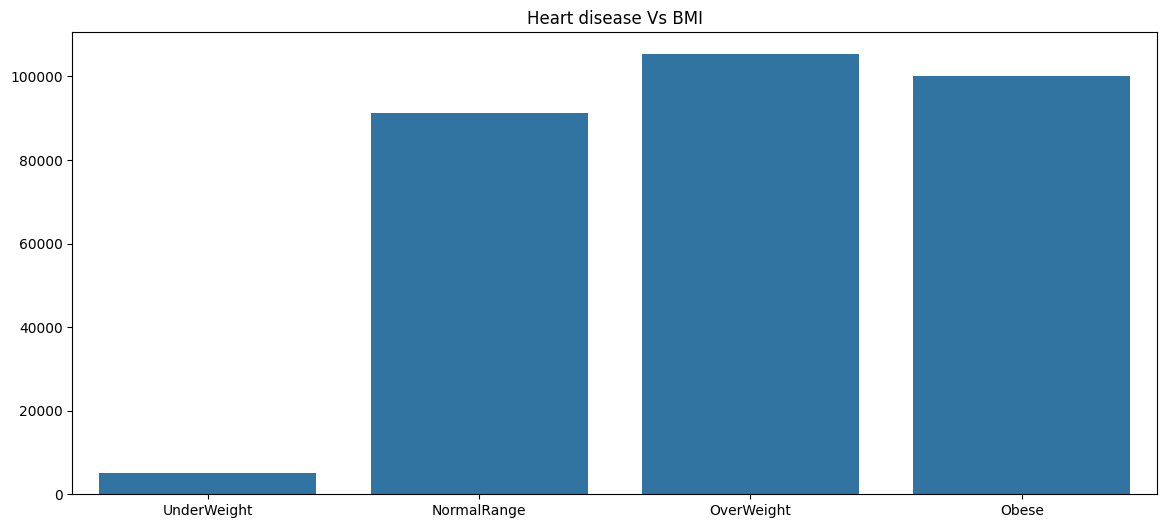

In [23]:
# classification of BMI (Body Mass Index) by ranges :
BMI_UnderWeight = data['BMI'][(data['BMI']>=0) & (data['BMI'] <= 18.5)]
BMI_NormalRange = data['BMI'][(data['BMI']>18.5) & (data['BMI'] <= 25)]
BMI_OverrWeight = data['BMI'][(data['BMI']>25) & (data['BMI'] <= 30)]
BMI_Obese = data['BMI'][(data['BMI']>30)]

BMI_X = ['UnderWeight','NormalRange','OverWeight','Obese']
BMI_Y = [len(BMI_UnderWeight.values),len(BMI_NormalRange.values),len(BMI_OverrWeight.values),len(BMI_Obese.values)]

plt.figure(figsize = (14,6))
sns.barplot (x = BMI_X, y = BMI_Y)
plt.title('Heart disease Vs BMI')
plt.show()

<Axes: >

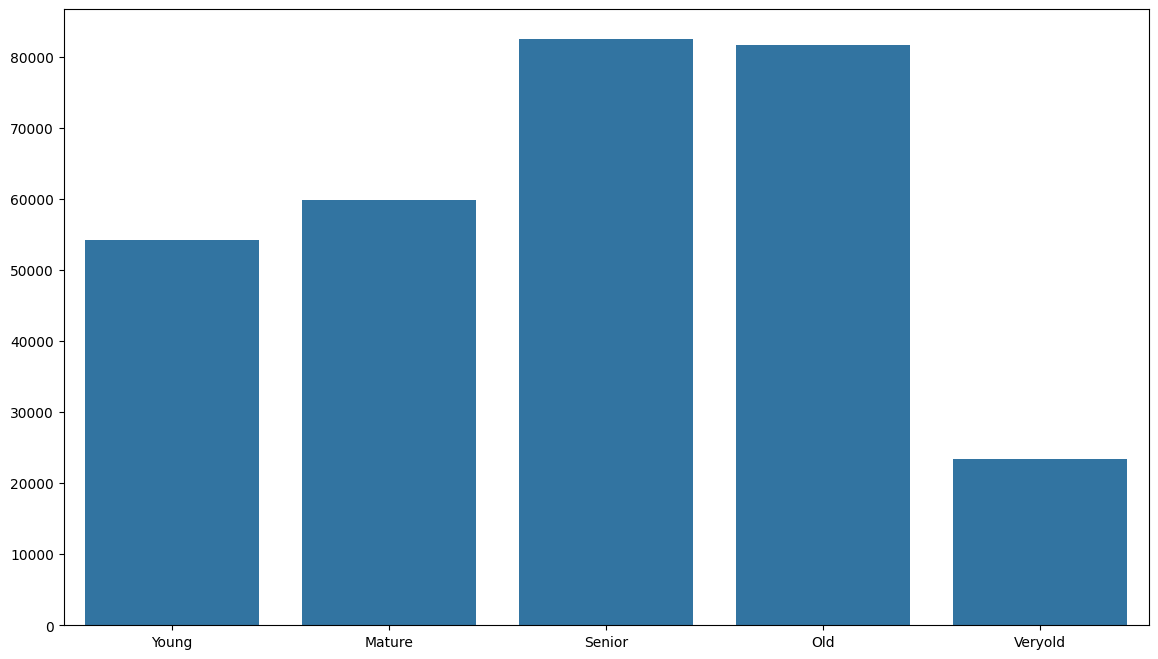

In [24]:
# classification of Age Category by ranges :
Young   = data['AgeCategory'][(data['AgeCategory'] <= 32.0)]
Mature  = data['AgeCategory'][(data['AgeCategory'] >= 37.0) & (data['AgeCategory'] <= 47.0)]
Senior  = data['AgeCategory'][(data['AgeCategory'] >= 52.0) & (data['AgeCategory'] <= 62.0)]
Old     = data['AgeCategory'][(data['AgeCategory'] >= 67.0) & (data['AgeCategory'] <= 77.0)]
Veryold = data['AgeCategory'][(data['AgeCategory'] == 80.0)]

Age_X = ['Young','Mature','Senior','Old','Veryold']
Age_Y = [len(Young.values),len(Mature.values),len(Senior.values),len(Old.values),len(Veryold.values)]

plt.figure(figsize = (14,8))
sns.barplot (x = Age_X, y = Age_Y)

<Axes: xlabel='Smoking', ylabel='count'>

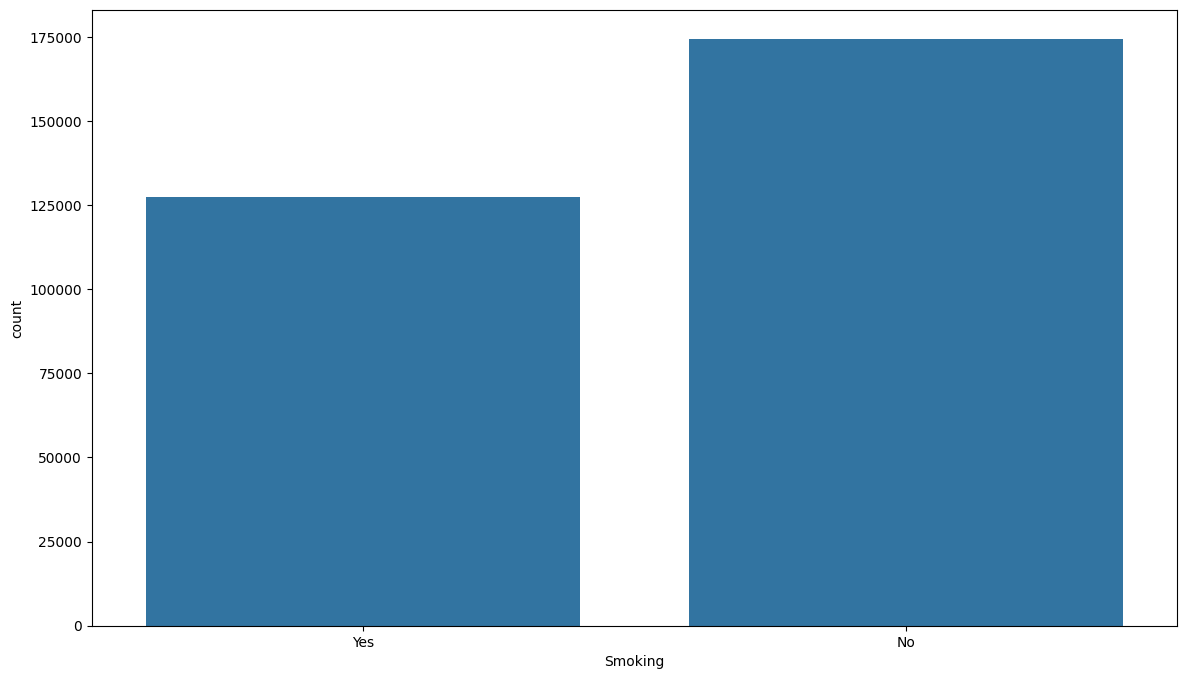

In [25]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Smoking")

<Axes: xlabel='AlcoholDrinking', ylabel='count'>

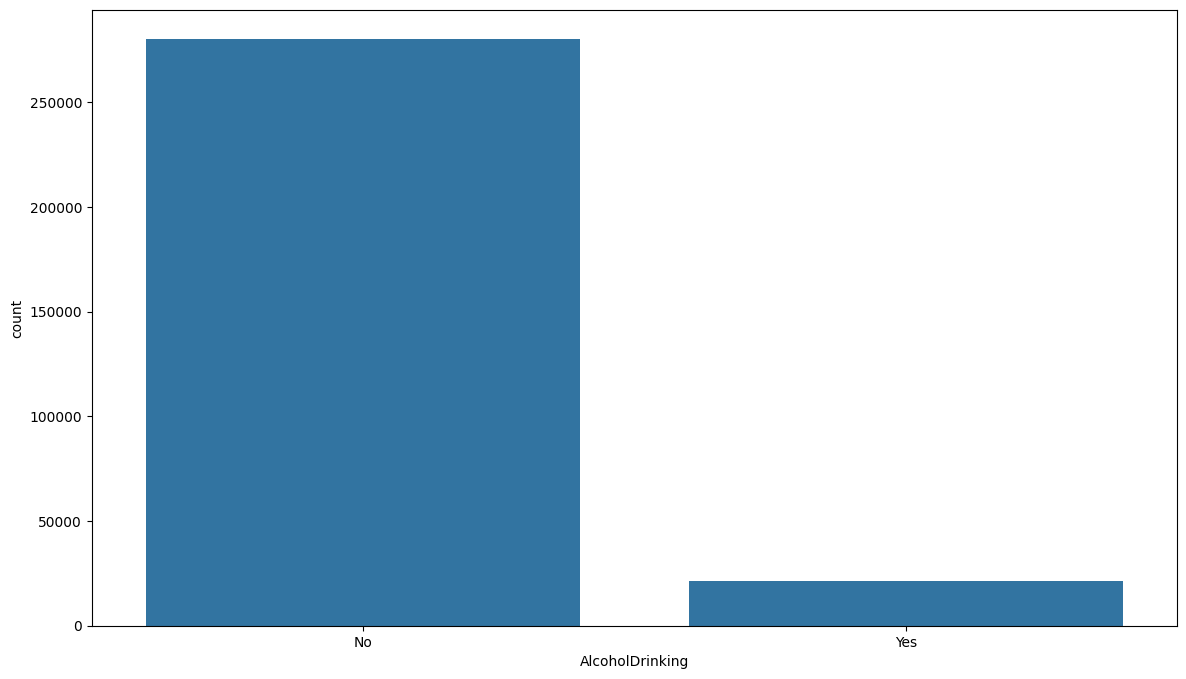

In [26]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="AlcoholDrinking")

<Axes: xlabel='Stroke', ylabel='count'>

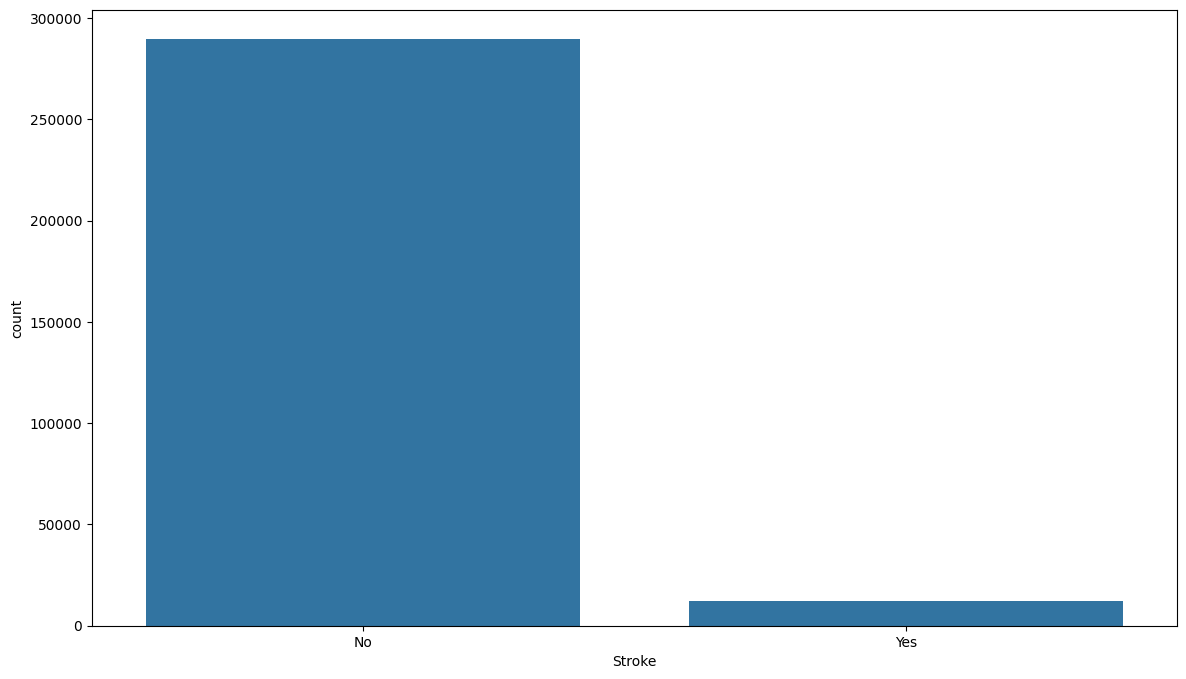

In [27]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Stroke")

<Axes: xlabel='Sex', ylabel='count'>

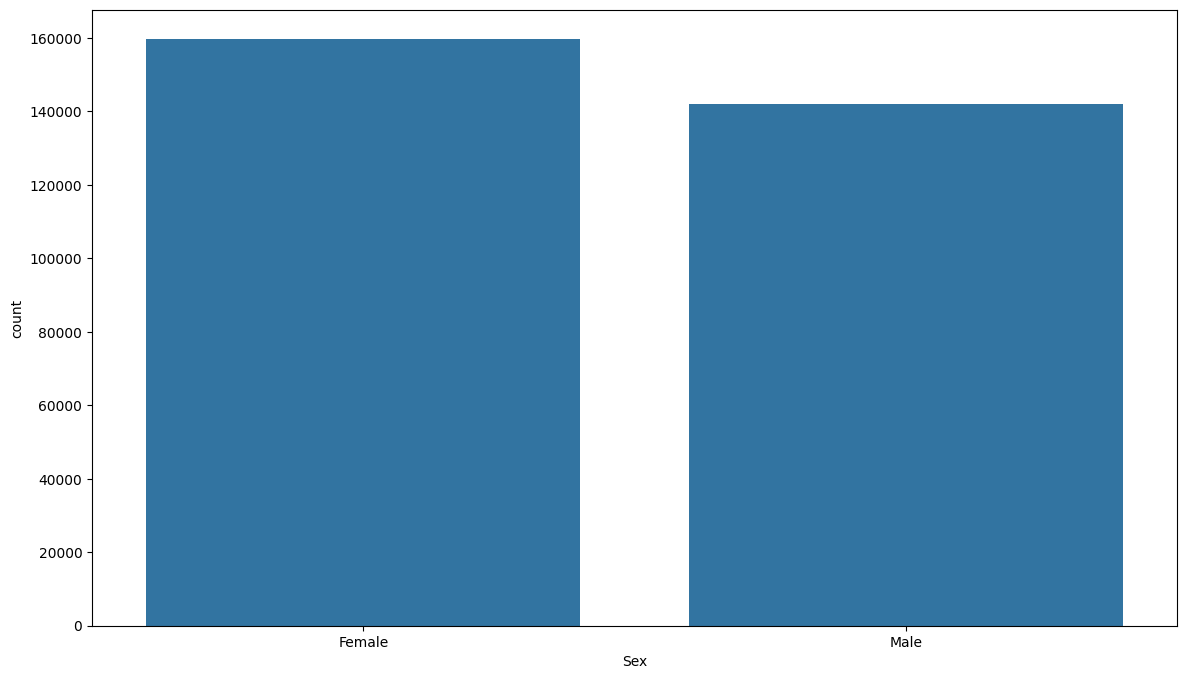

In [28]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Sex")

<Axes: xlabel='AgeCategory', ylabel='count'>

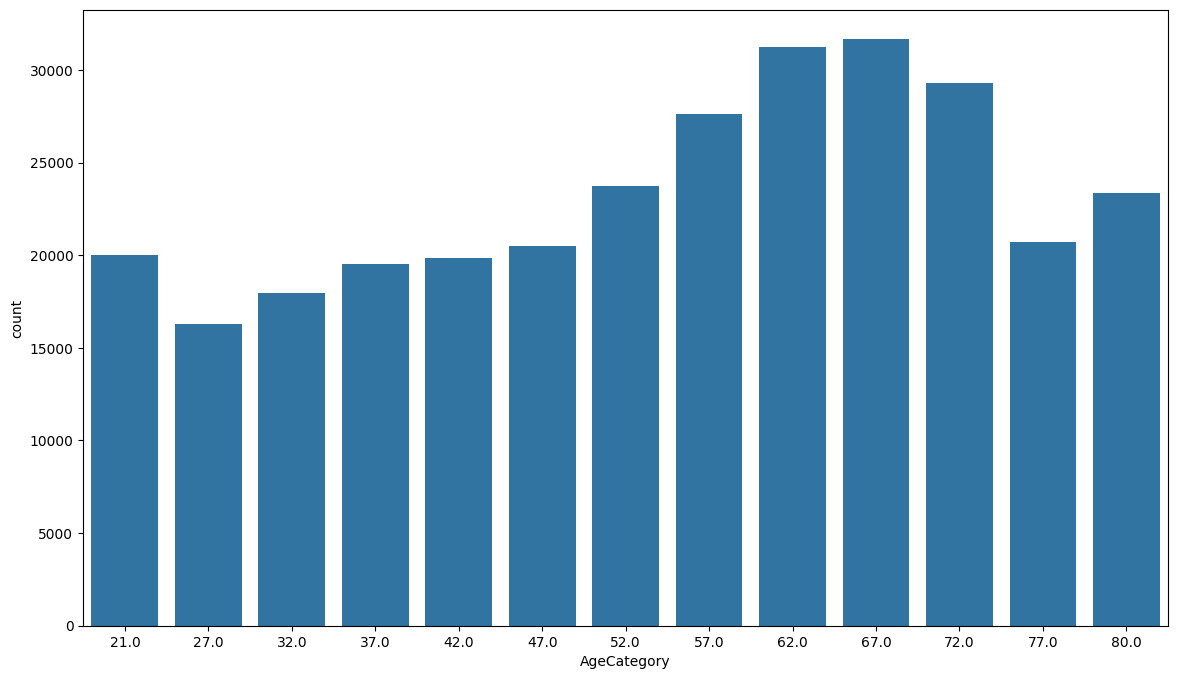

In [29]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="AgeCategory")

<Axes: xlabel='Race', ylabel='count'>

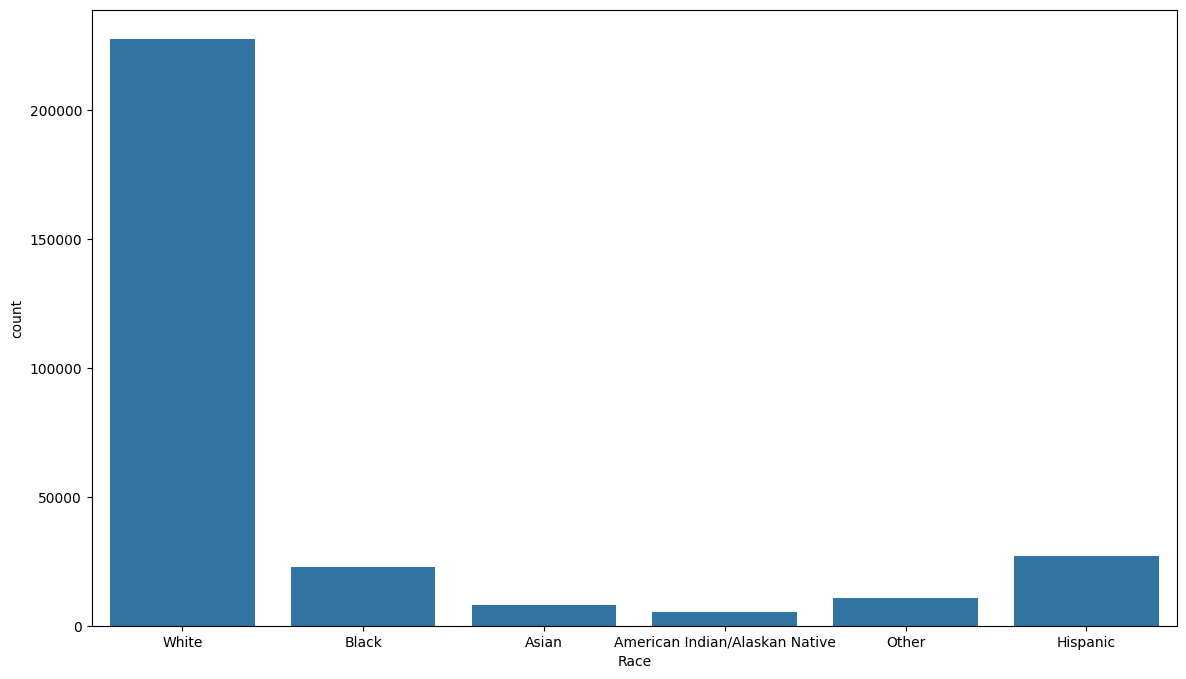

In [30]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Race")

 American Indian/Alaskan Native -->     5202

 Asian                          -->     8068

 Black                          -->    22939

 Hispanic                       -->    27446

 Other                          -->    10928

 White                          -->   245212

<Axes: xlabel='Diabetic', ylabel='count'>

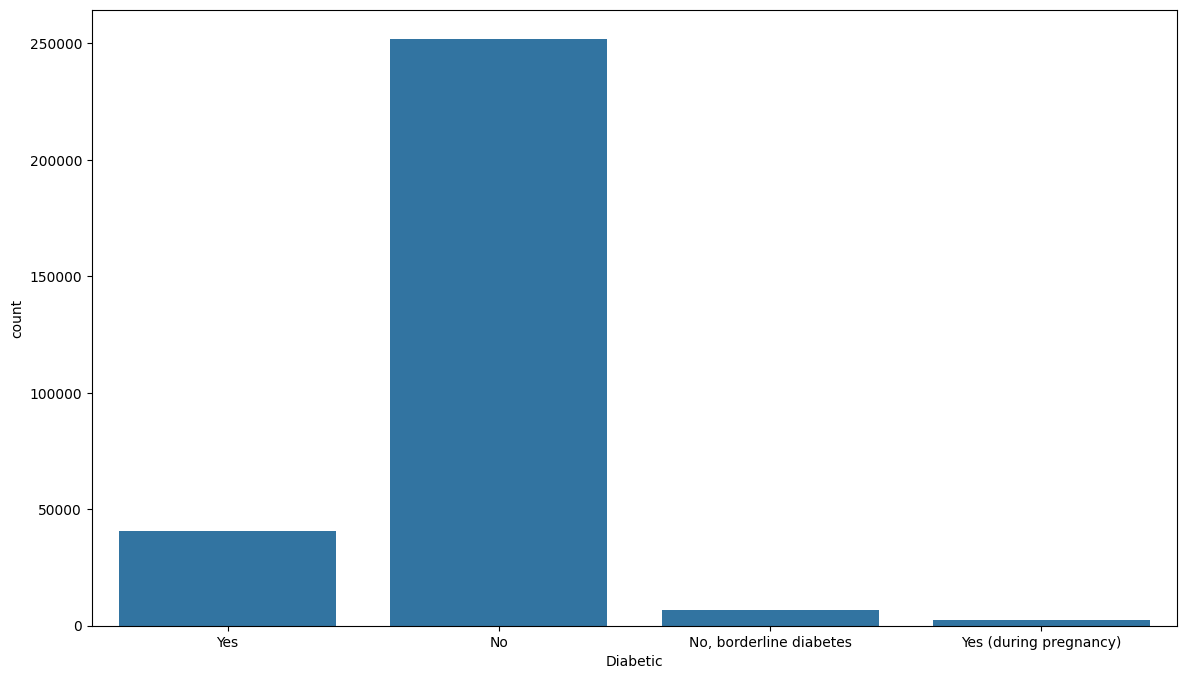

In [31]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Diabetic")

<Axes: xlabel='PhysicalActivity', ylabel='count'>

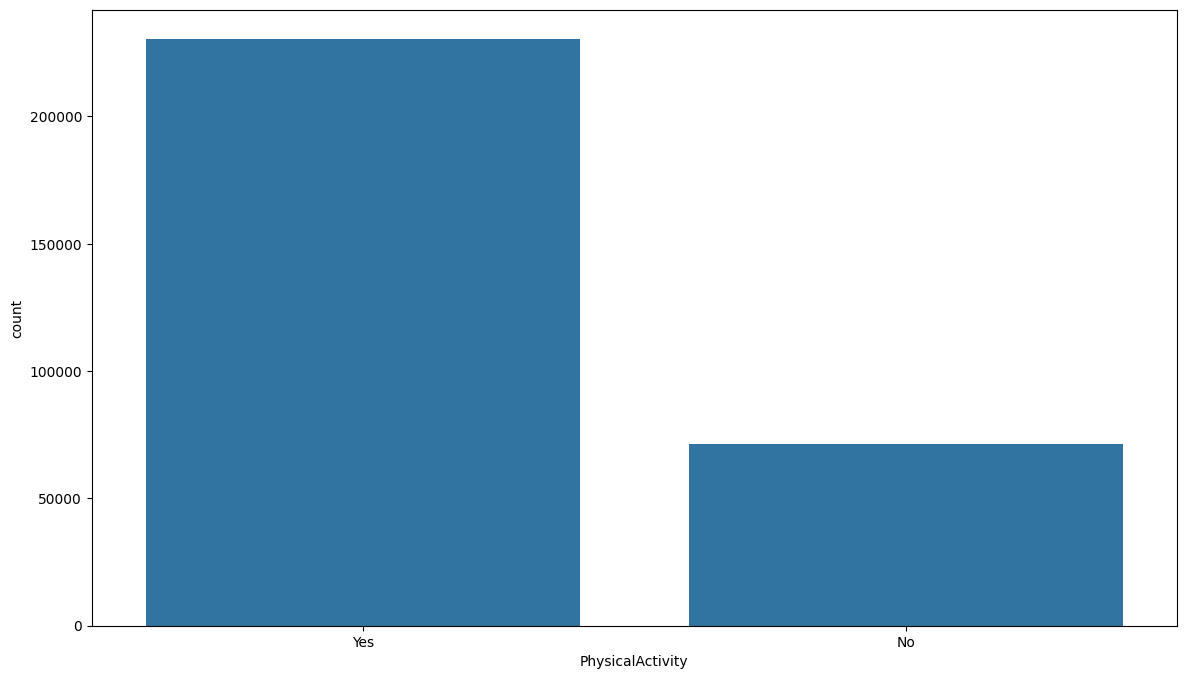

In [32]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="PhysicalActivity")

<Axes: xlabel='GenHealth', ylabel='count'>

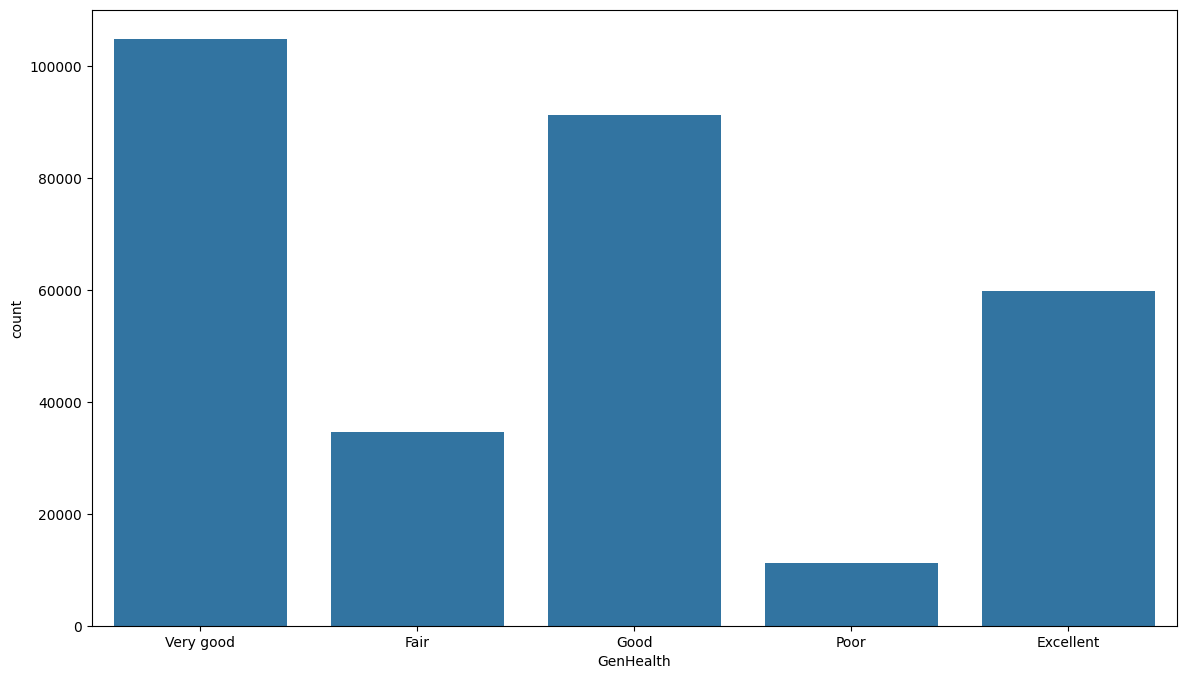

In [33]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="GenHealth")

<Axes: xlabel='SleepTime', ylabel='count'>

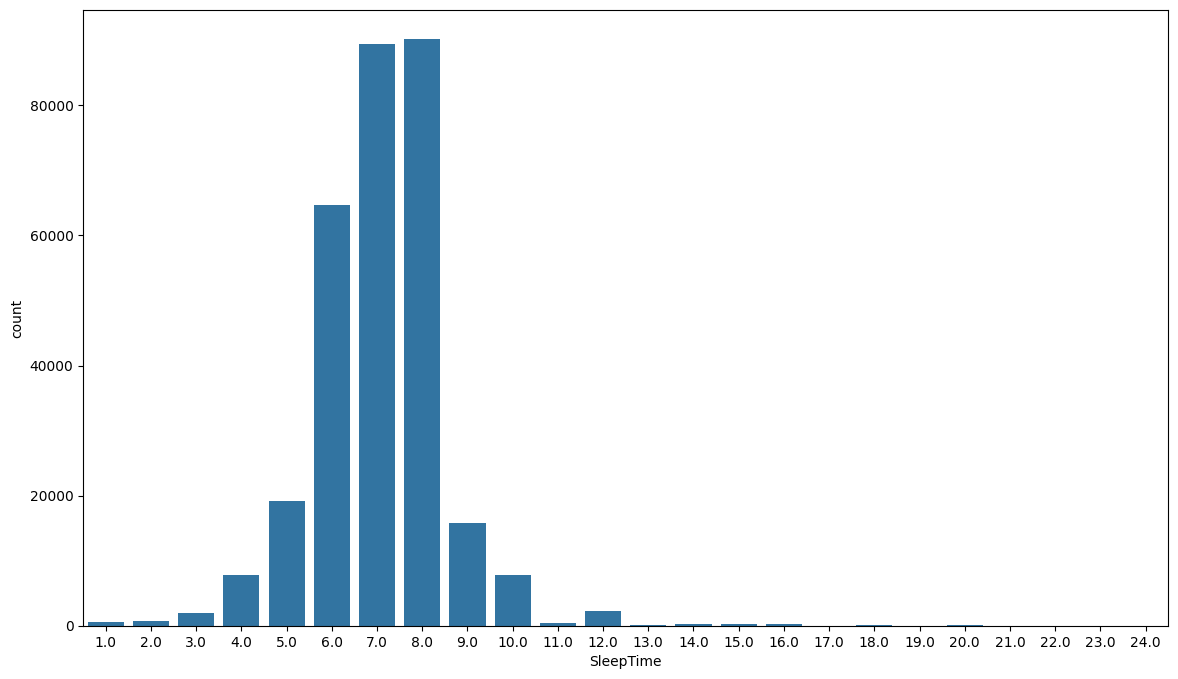

In [34]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="SleepTime")

<Axes: xlabel='Asthma', ylabel='count'>

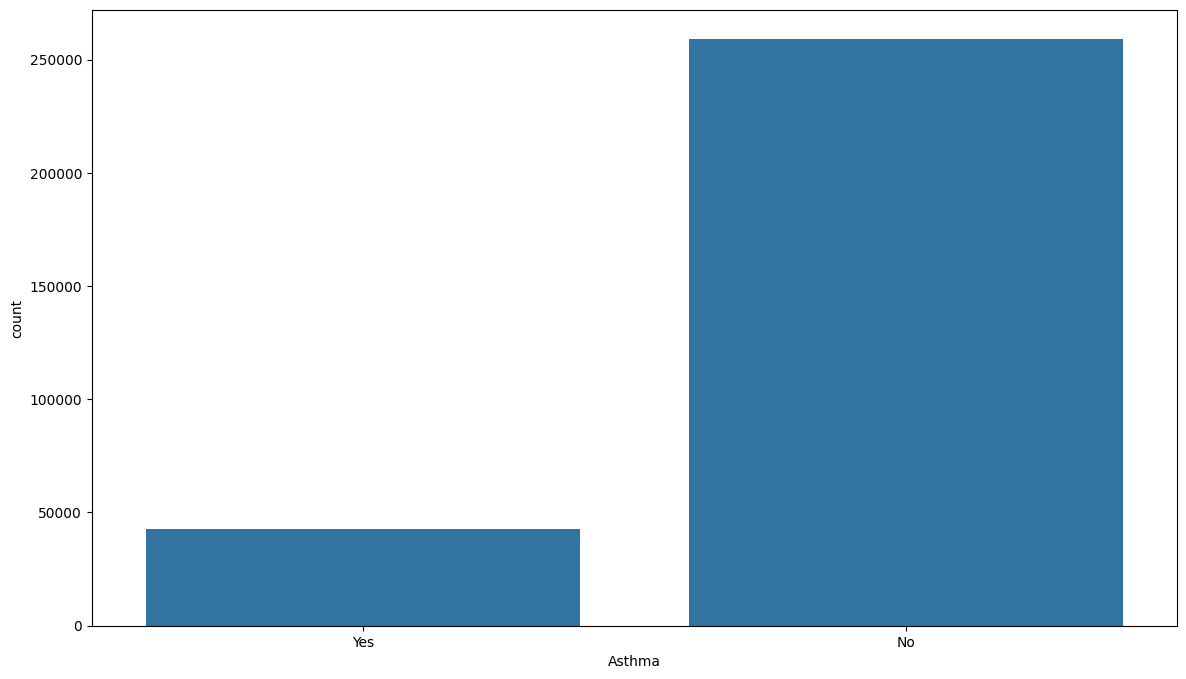

In [35]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Asthma")

<Axes: xlabel='KidneyDisease', ylabel='count'>

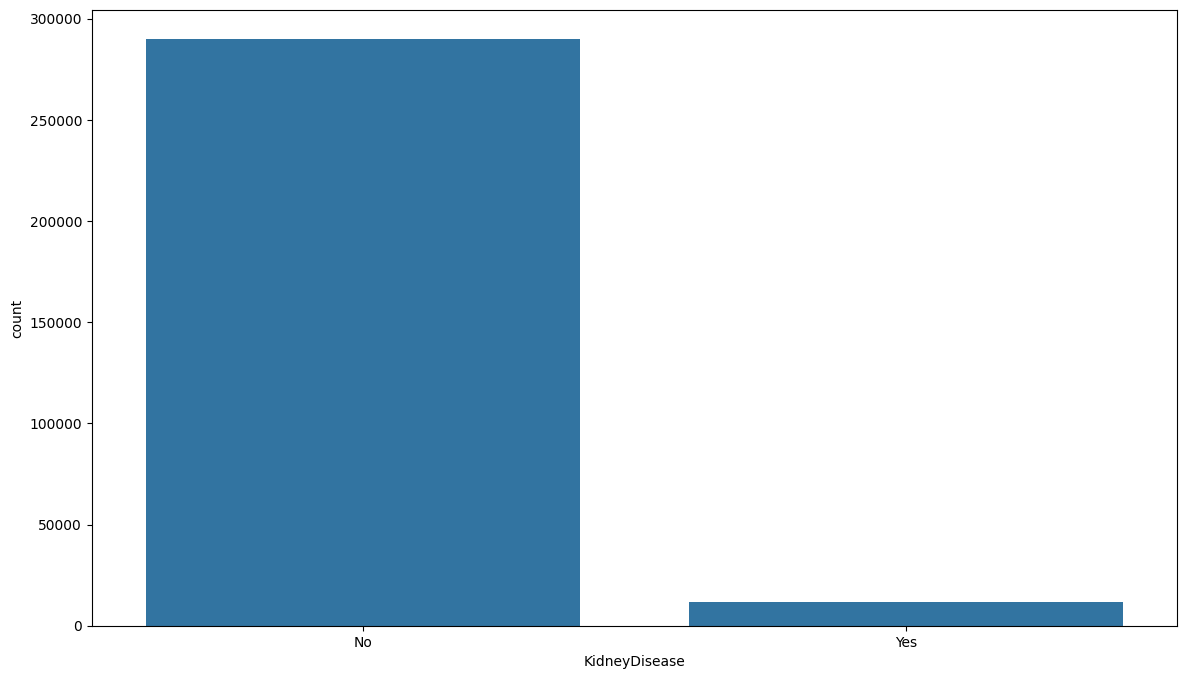

In [36]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="KidneyDisease")

<Axes: xlabel='SkinCancer', ylabel='count'>

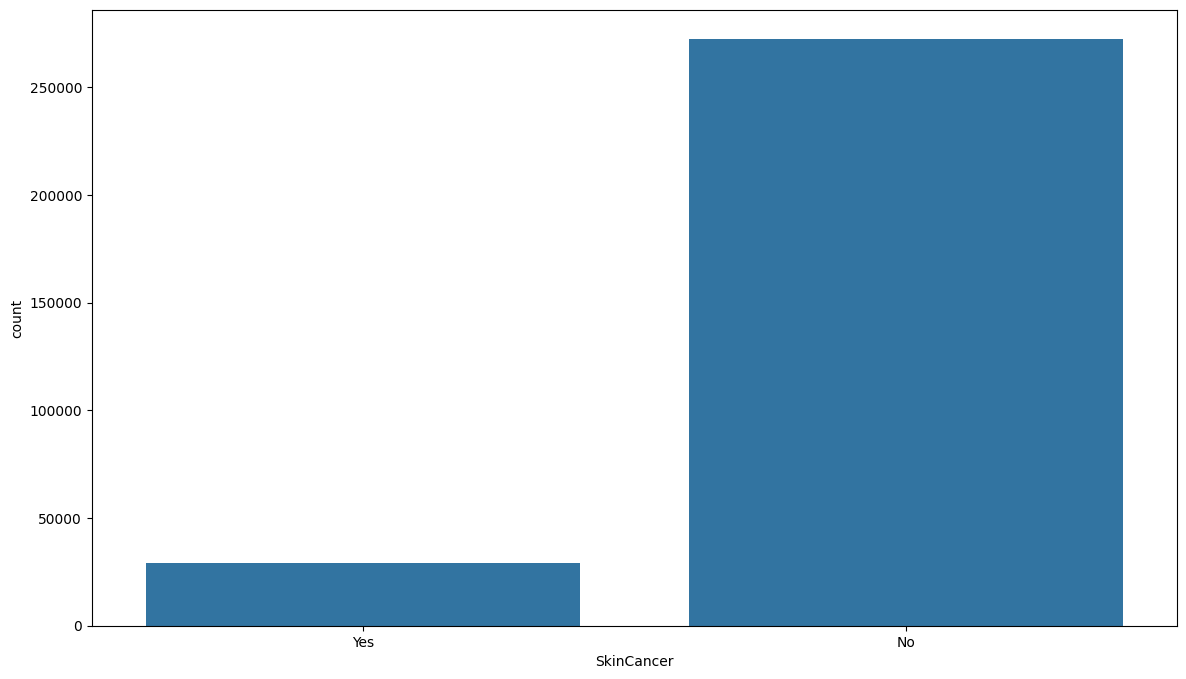

In [37]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="SkinCancer")

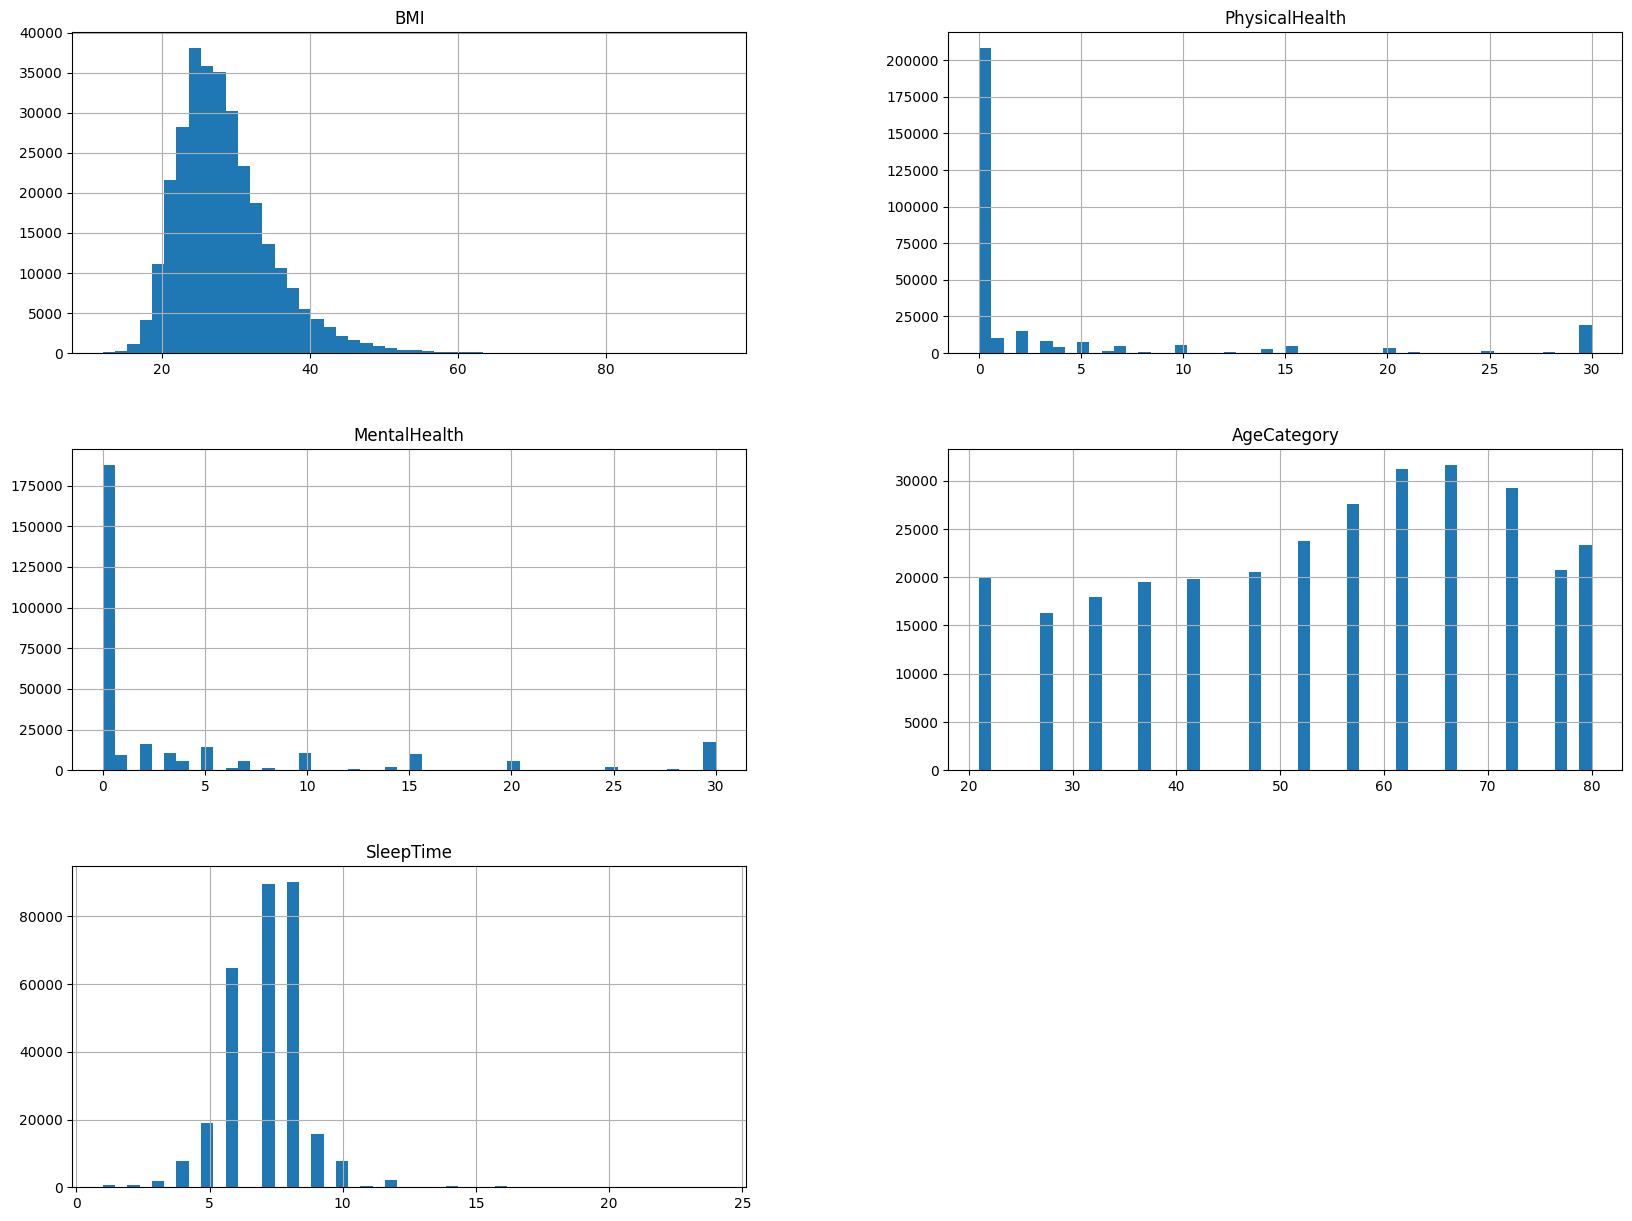

In [38]:
data.hist(bins=50, figsize=(20,15))
plt.show()

# Converting catergical data to numerical


In [39]:
cat_columns = data.select_dtypes(['object']).columns
cat_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [40]:
df_1 = pd.get_dummies(data, columns = cat_columns[1:])
df_1['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
df_1.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,57.0,5.0,False,True,True,False,...,False,False,False,True,False,True,True,False,False,True
1,0,20.34,0.0,0.0,80.0,7.0,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False
2,0,26.58,20.0,30.0,67.0,8.0,False,True,True,False,...,True,False,False,False,False,True,True,False,True,False
3,0,24.21,0.0,0.0,77.0,6.0,True,False,True,False,...,False,True,False,False,True,False,True,False,False,True
4,0,23.71,28.0,0.0,42.0,8.0,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False


In [41]:
X = df_1.drop('HeartDisease',axis=1)
y = df_1['HeartDisease']

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Balancing the heart disease results

In [42]:
df_1['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, stratify=y)

# Check Balance

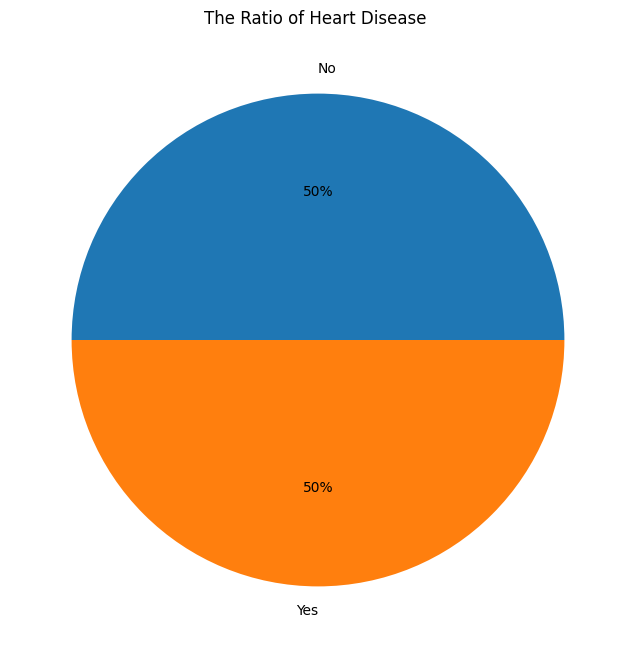

In [44]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

# Data Modelling

In [45]:
models = {
    "Decision Tree":DecisionTreeClassifier(random_state = 44, max_depth=20),
    "Logistic R.": LogisticRegression(random_state = 44),
    "Naive Bayes C":BernoulliNB(),
    "SVC":SVC(kernel='linear',max_iter=100,C=1.0,gamma='auto'),
    "Random Forest":RandomForestClassifier(random_state = 44, max_depth=20)
}
results = pd.DataFrame(columns=['Model','Recall TP/TP+FN','Precision TP/TP+FP','f1-score','accuracy TP+TN)/all'])

In [65]:
def test_models(X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
      fit = model.fit(X_train, y_train)
      y_pred = fit.predict(X_test)

      # Create confusion matrix
      cm = confusion_matrix(y_test, y_pred)

      # Plot confusion matrix
      fig, ax = plt.subplots(figsize=(6, 4))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
      ax.set_title(f'Confusion Matrix - {model_name}')
      ax.set_xlabel('Predicted')
      ax.set_ylabel('Actual')
      plt.show()

      # Calculate metrics
      recall = round(recall_score(y_test, y_pred, average='weighted')*100, 2)
      precision = round(precision_score(y_test, y_pred, average='weighted')*100, 2)
      f1 = round(f1_score(y_test, y_pred, average='weighted')*100, 2)
      accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

      # Store results
      results.loc[len(results.index)] = [model_name, recall, precision, f1, accuracy]
      print(f"Model: {model_name}")
      print(f"Recall: {recall}%")
      print(f"Precision: {precision}%")
      print(f"F1 Score: {f1}%")
      print(f"Accuracy: {accuracy}%")
      print('-'*30)

    return results

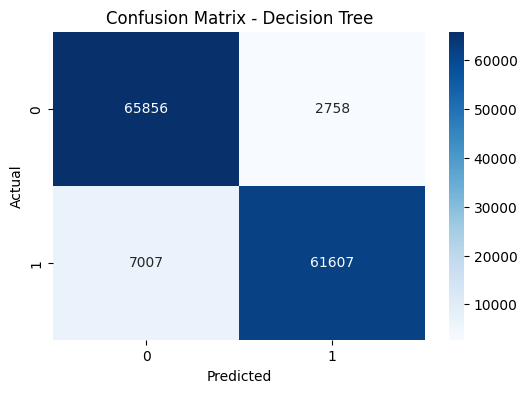

Model: Decision Tree
Recall: 92.88%
Precision: 93.05%
F1 Score: 92.88%
Accuracy: 92.88%
------------------------------


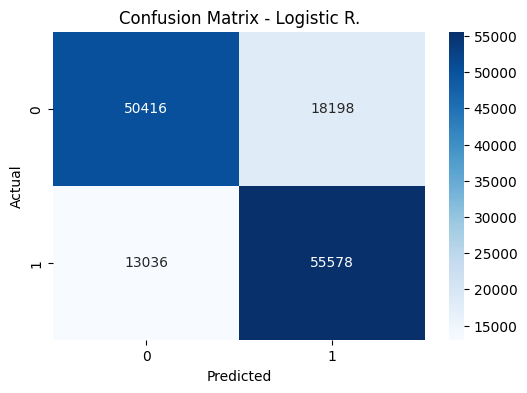

Model: Logistic R.
Recall: 77.24%
Precision: 77.39%
F1 Score: 77.21%
Accuracy: 77.24%
------------------------------


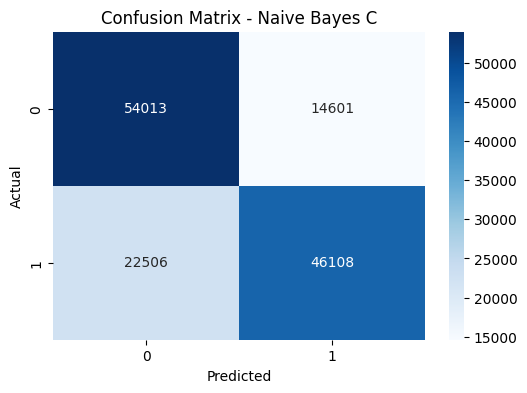

Model: Naive Bayes C
Recall: 72.96%
Precision: 73.27%
F1 Score: 72.87%
Accuracy: 72.96%
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


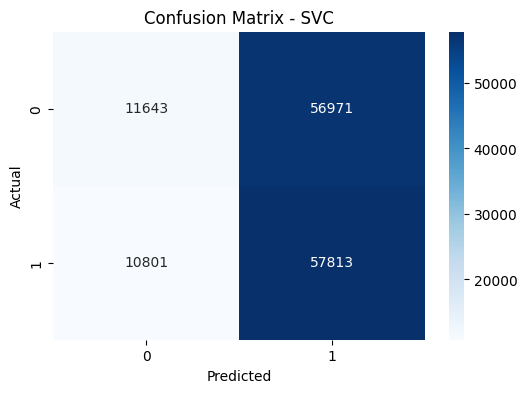

Model: SVC
Recall: 50.61%
Precision: 51.12%
F1 Score: 44.31%
Accuracy: 50.61%
------------------------------


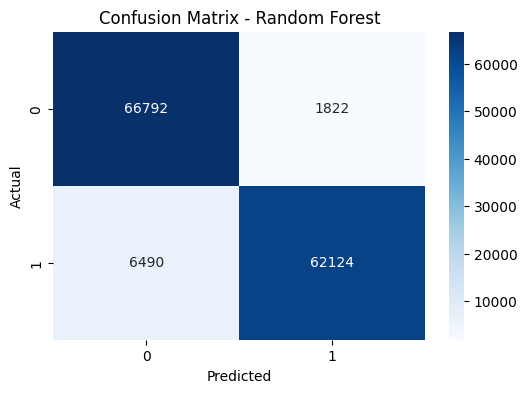

Model: Random Forest
Recall: 93.94%
Precision: 94.15%
F1 Score: 93.94%
Accuracy: 93.94%
------------------------------
           Model  Recall TP/TP+FN  Precision TP/TP+FP  f1-score  \
0  Decision Tree            92.88               93.05     92.88   
1    Logistic R.            77.24               77.39     77.21   
2  Naive Bayes C            72.96               73.27     72.87   
3            SVC            50.61               51.12     44.31   
4  Random Forest            93.94               94.15     93.94   

   accuracy TP+TN)/all  
0                92.88  
1                77.24  
2                72.96  
3                50.61  
4                93.94  


In [67]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
results = test_models(X_train, X_test, y_train, y_test)
print(results)

# Choose best model

In [68]:
results.sort_values('accuracy TP+TN)/all', ascending=False)

,Model,Recall TP/TP+FN,Precision TP/TP+FP,f1-score,accuracy TP+TN)/all
4,Random Forest,93.94,94.15,93.94,93.94
0,Decision Tree,92.88,93.05,92.88,92.88
1,Logistic R.,77.24,77.39,77.21,77.24
2,Naive Bayes C,72.96,73.27,72.87,72.96
3,SVC,50.61,51.12,44.31,50.61


# The Random Forest model has the best accuracy but it takes the longest time compared to Decision Tree,The Decision Tree is the best model for accuracy and consumption of resources and time

# Deployment

In [69]:
import joblib

In [70]:
model = RandomForestClassifier()
joblib.dump(model, 'model.pkl')

['model.pkl']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']